                               Problem Statement
The data is related to direct marketing campaigns of a financial institution.The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was
required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no')
subscribed.

                                   Attributes                                 
1 - age                                                           
2 - job : type of job                                                     
3 - marital : marital status                                                               
4 - education                                                                                 
5 - default: has credit in default?                                                  
6 - balance:                                                        
7 - housing: has housing loan?                                         
8 - loan: has personal loan?                                                         
9 - contact: contact communication type                                          
10 - month: last contact month of year                                                
11 - day: last contact day of the week                                                      
12 - duration: last contact duration, in seconds (numeric).                                                          
13 - campaign: number of contacts performed during this campaign and for this client             
14 - pdays: number of days that passed by after the client was last contacted from a previous 
campaign                                                                                    
15 - previous: number of contacts performed before this campaign and for this client                
16 - poutcome: outcome of the previous marketing campaign                                              
17 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')                       

                                   Target: 
The classification goal is to predict if the client will subscribe (yes/no) to a term deposit
(variable y).

In [1]:
# Importing necessary libraries
import pandas as pd
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
#Reading the dataset and storing it in a variable
df = pd.read_csv("data.csv")

In [3]:
# the first 5 rows of  the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [4]:
df.shape

(8371, 17)

In [5]:
c1=df["deposit"].value_counts()
c1

no     4428
yes    3943
Name: deposit, dtype: int64

4428 have subscribed to term deposit and 3943 haven't

<AxesSubplot:>

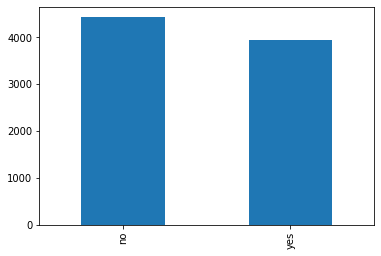

In [6]:
c1.plot(kind="bar")

4428 have subscribed to term deposit and 3943 haven't

<AxesSubplot:xlabel='loan', ylabel='count'>

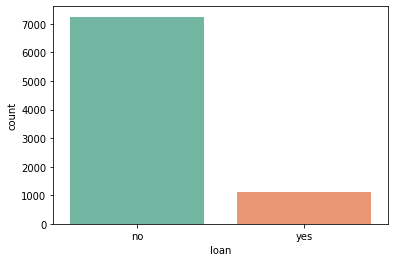

In [7]:
sns.countplot(x="loan",data=df,palette="Set2")


In [8]:
c3=df["loan"].value_counts()
c3

no     7250
yes    1121
Name: loan, dtype: int64

We infer that 7250 have not taken loan and 1121 have taken loan.

<AxesSubplot:xlabel='marital', ylabel='count'>

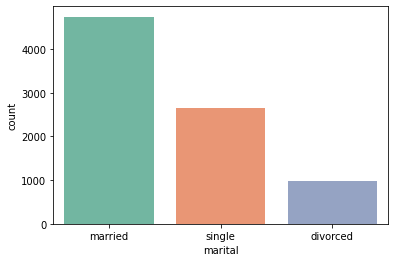

In [9]:
sns.countplot(x="marital",data=df,palette="Set2")

In [10]:
c2=df["marital"].value_counts()
c2

married     4744
single      2645
divorced     982
Name: marital, dtype: int64

We infer that 4744 are married, 2645 are single and 982 are divorced

In [11]:
#encoding the features having string values into integer type

from sklearn import preprocessing
label1_1 = preprocessing.LabelEncoder()
label1_2 = preprocessing.LabelEncoder()
label1_3 = preprocessing.LabelEncoder()
label1_4 = preprocessing.LabelEncoder()
label1_5 = preprocessing.LabelEncoder()
label1_6 = preprocessing.LabelEncoder()
label1_7 = preprocessing.LabelEncoder()


df['job'] = label1_1.fit_transform(df['job'])
df['marital'] = label1_2.fit_transform(df['marital'])
df['education'] = label1_3.fit_transform(df['education'])
df['housing'] = label1_4.fit_transform(df['housing'])
df['loan'] = label1_5.fit_transform(df['loan'])
df['month'] = label1_6.fit_transform(df['month'])
df['deposit'] = label1_7.fit_transform(df['deposit'])



<AxesSubplot:>

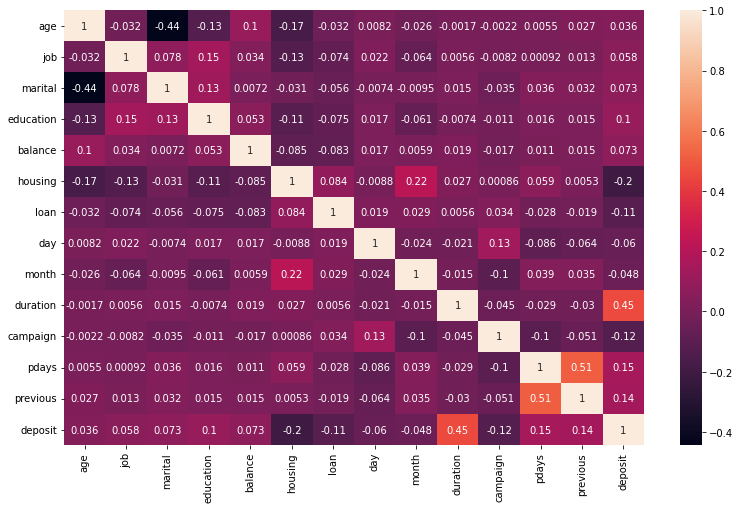

In [12]:
# correlation of all the features in a heatmap

plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True)

In [13]:
### separating dataset into dependent and independent features
x=df.drop(["day","campaign","default","poutcome","contact","deposit"],axis=1)
y=df["deposit"]

In [14]:
#Independent variables
x[:5]

,age,job,marital,education,balance,housing,loan,month,duration,pdays,previous
0,38,9,1,2,127,1,0,10,113,50,2
1,41,3,1,0,365,0,0,1,203,-1,0
2,39,4,2,2,2454,1,0,8,716,263,2
3,49,1,1,0,6215,1,0,8,549,-1,0
4,37,7,1,1,1694,1,1,4,404,251,6


In [15]:
#Dependent Variables
y[:5]

0    0
1    0
2    1
3    0
4    0
Name: deposit, dtype: int32

In [16]:
# splitting the data into test and train values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.7, random_state =12)

Trying Logistic Regression

In [17]:
model=LogisticRegression()

Fitting the model

In [18]:
model.fit(X_train,y_train)

LogisticRegression()

Getting the predicted values

In [19]:
y_pred=model.predict(X_test)

In [20]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[2525,  596],
       [ 859, 1880]], dtype=int64)

In [22]:
# from sklearn.metrics import accuracy_score
from sklearn.metrics import *
ac=accuracy_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("The accurace score : ")
print(ac*100)
print("The precision score : ")
print(pr)
print("The f1_score : ")
print(f1)

The accurace score : 
75.17064846416382
The precision score : 
0.7592891760904685
The f1_score : 
0.7209971236816874


Hence we have calculated accuracy score, precision and f1_score after applying logistic regression

Decision Tree!!

In [23]:
from sklearn.tree import DecisionTreeClassifier
mod=DecisionTreeClassifier()
mod.fit(X_train,y_train)

DecisionTreeClassifier()

Getting the predicted values

In [24]:
y_pred=mod.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [25]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2422,  699],
       [ 760, 1979]], dtype=int64)

In [26]:
ac=accuracy_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("The accuracy score : ")
print(ac*100)
print("The precision score : ")
print(pr)
print("The f1_score : ")
print(f1)

The accuracy score : 
75.10238907849829
The precision score : 
0.7389843166542196
The f1_score : 
0.7306627284474801


Hence we have calculated accuracy score, precision and f1_score after applying decision tree algorithm

Random Forest !!

In [27]:
from sklearn.ensemble import RandomForestClassifier
mod=RandomForestClassifier()
mod.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_pred=mod.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

Confusion matrix

In [29]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2506,  615],
       [ 439, 2300]], dtype=int64)

In [30]:
ac=accuracy_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("The accuracy score : ")
print(ac)
print("The precision score : ")
print(pr)
print("The f1_score : ")
print(f1)
rs=recall_score(y_test,y_pred)
print("The recall score is : ")
print(rs)

The accuracy score : 
0.8201365187713311
The precision score : 
0.7890222984562607
The f1_score : 
0.8135833038556775
The recall score is : 
0.8397225264695144


Hence we have calculated accuracy score, precision and f1_score after applying random forest which leads to our conclusion - 
the best one is Random forest approach 

In [31]:
#reading a test data dataset and storing it in a variable
dfl=pd.read_csv("test_data.csv")

In [32]:
dfl.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown
3,33,technician,married,secondary,no,488,yes,no,unknown,8,may,703,1,-1,0,unknown
4,34,admin.,married,secondary,no,40,yes,no,telephone,5,may,125,2,-1,0,unknown


In [33]:
dfl.shape

(2791, 16)

In [34]:
data=dfl
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown
3,33,technician,married,secondary,no,488,yes,no,unknown,8,may,703,1,-1,0,unknown
4,34,admin.,married,secondary,no,40,yes,no,telephone,5,may,125,2,-1,0,unknown


Now we'll encode the string valued attributes into type int

In [35]:
label2_1 = preprocessing.LabelEncoder()
label2_2 = preprocessing.LabelEncoder()
label2_3 = preprocessing.LabelEncoder()
label2_4 = preprocessing.LabelEncoder()
label2_5 = preprocessing.LabelEncoder()
label2_6 = preprocessing.LabelEncoder()

data['job'] = label2_1.fit_transform(data['job'])
data['marital'] = label2_2.fit_transform(data['marital'])
data['education'] = label2_3.fit_transform(data['education'])
data['housing'] = label2_4.fit_transform(data['housing'])
data['loan'] = label2_5.fit_transform(data['loan'])
data['month'] = label2_6.fit_transform(data['month'])

The test data is as follows:

In [36]:
x1=data.drop(["day","campaign","default","poutcome","contact"],axis=1)

Since we tried the random forest approach in the last, therefore the predicted values will be those of the random forest approach
Thus getting the predicted values

In [37]:
test_data_pred=mod.predict(x1)
test_data_pred

array([1, 1, 0, ..., 1, 1, 1])

Decoding the encoded data back to original form

In [38]:
data['job'] = label2_1.inverse_transform(data['job'])
data['marital'] = label2_2.inverse_transform(data['marital'])
data['education'] = label2_3.inverse_transform(data['education'])
data['housing'] = label2_4.inverse_transform(data['housing'])
data['loan'] = label2_5.inverse_transform(data['loan'])
data['month'] = label2_6.inverse_transform(data['month'])

In [39]:
dfl.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown
3,33,technician,married,secondary,no,488,yes,no,unknown,8,may,703,1,-1,0,unknown
4,34,admin.,married,secondary,no,40,yes,no,telephone,5,may,125,2,-1,0,unknown


In [40]:
dfl["deposit"]=test_data_pred

In [41]:
dfl.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure,1
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown,1
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown,0
3,33,technician,married,secondary,no,488,yes,no,unknown,8,may,703,1,-1,0,unknown,1
4,34,admin.,married,secondary,no,40,yes,no,telephone,5,may,125,2,-1,0,unknown,0


In [42]:
dfl.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2786,44,management,single,tertiary,yes,12,yes,no,cellular,19,nov,126,2,-1,0,unknown,0
2787,37,management,single,tertiary,no,33,yes,no,cellular,12,mar,186,1,-1,0,unknown,0
2788,42,admin.,divorced,secondary,no,936,no,no,cellular,30,jan,931,1,-1,0,unknown,1
2789,38,student,single,unknown,no,64,no,no,cellular,6,aug,789,1,-1,0,unknown,1
2790,29,admin.,married,tertiary,no,332,no,no,cellular,9,apr,179,1,-1,0,unknown,1


In [43]:
dfl.shape

(2791, 17)

In [44]:
df2=df["deposit"]

In [45]:
df2.head()

0    0
1    0
2    1
3    0
4    0
Name: deposit, dtype: int32

In [46]:
for i in range(2791):
    if(df2[i]==1):
        df2[i]="yes"
    else: df2[i]="no"

In [47]:
df2.head()

0     no
1     no
2    yes
3     no
4     no
Name: deposit, dtype: object

In [48]:
df2.to_csv('results.csv')